In [46]:
# All the imports required for the preprocessing and classification are done here 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, confusion_matrix, precision_score, roc_auc_score, roc_curve, auc, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# So here I imported the dataset of the financial_lending
# Due to some unnamed columns are present I removed them manually and feature application_id was also
# removed using dropna method
df =  pd.read_csv('financial_lending.csv')
df = df.drop(columns=['application_id'] + [col for col in df.columns if col.startswith('Unnamed')])
df

,applicant_gender,is_married,num_dependents,education_level,is_self_employed,primary_income,secondary_income,loan_amount_requested,term_duration_months,has_credit_history,residence_area,approval_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,applicant_gender,is_married,num_dependents,education_level,is_self_employed,primary_income,secondary_income,loan_amount_requested,term_duration_months,has_credit_history,residence_area,approval_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum() 

applicant_gender         13
is_married                3
num_dependents           15
education_level           0
is_self_employed         32
primary_income            0
secondary_income          0
loan_amount_requested    22
term_duration_months     14
has_credit_history       50
residence_area            0
approval_status           0
dtype: int64

In [5]:
df.drop_duplicates()

,applicant_gender,is_married,num_dependents,education_level,is_self_employed,primary_income,secondary_income,loan_amount_requested,term_duration_months,has_credit_history,residence_area,approval_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
# So here I have the null values present in the features so I needed to hanlde them
# here I imputed with median and mode to handle null values in numerical features and
# here the numerical features are clearly 'primary_income', 'secondary_income', 'loan_amount_requested', 'term_duration_months', 
# here the primary_income and secondary_income features had no null values so I didn't handle them.
df['loan_amount_requested'] = df['loan_amount_requested'].fillna(df['loan_amount_requested'].median())
df['term_duration_months'] = df['term_duration_months'].fillna(df['term_duration_months'].mode()[0])

In [7]:
df.isnull().sum() # as we can see here I imputed the numerical columns correctly

applicant_gender         13
is_married                3
num_dependents           15
education_level           0
is_self_employed         32
primary_income            0
secondary_income          0
loan_amount_requested     0
term_duration_months      0
has_credit_history       50
residence_area            0
approval_status           0
dtype: int64

In [8]:
# These are catogorical columns with null values to be imputed with the mode
catogorical_cols_nulls = ['applicant_gender', 'num_dependents', 'is_self_employed', 'has_credit_history', 'is_married']
for cols in catogorical_cols_nulls:
    df[cols] = df[cols].fillna(df[cols].mode()[0])

In [9]:
df.isnull().sum() # here i handled all the null values in the features

applicant_gender         0
is_married               0
num_dependents           0
education_level          0
is_self_employed         0
primary_income           0
secondary_income         0
loan_amount_requested    0
term_duration_months     0
has_credit_history       0
residence_area           0
approval_status          0
dtype: int64

In [10]:
# Here I have done the Feature Engineering i.e I have added the features total_income and the income_loan_ratio
# so that I can generalize the model based the features loan amount requested, primary income and secondary income
df['total_income'] = df['primary_income'] + df['secondary_income']
df['income_loan_ratio'] = df['total_income'] / df['loan_amount_requested']
# print(type('total_income'))
df[['total_income', 'income_loan_ratio']]

,total_income,income_loan_ratio
0,5849.0,45.695312
1,6091.0,47.585938
2,3000.0,45.454545
3,4941.0,41.175000
4,6000.0,42.553191
...,...,...
609,2900.0,40.845070
610,4106.0,102.650000
611,8312.0,32.853755
612,7583.0,40.550802


In [11]:
# To detect outliers in the numerical features, I used the Interquartile Range (IQR) method. For each feature, 
# I calculated the 25th percentile (Q1) and the 75th percentile (Q3). Any data points below Q1 - 1.5 * IQR 
# or above Q3 + 1.5 * IQR were considered outliers. I also counted and printed the number of
# outliers detected in each numerical feature
numeric_cols = ['primary_income', 'secondary_income', 'loan_amount_requested', 'term_duration_months']
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 =  df[col].quantile(0.75)
    IQR = q3-q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → {len(outliers)} outliers")

primary_income → 50 outliers
secondary_income → 18 outliers
loan_amount_requested → 41 outliers
term_duration_months → 88 outliers


In [12]:
# So since there are outliers I used Robust Scalar to reduce the impact of these outliers.
scaler = RobustScaler()
scaler_num = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(scaler_num, columns=numeric_cols)

In [13]:
print(df['approval_status'].value_counts(normalize=True))

approval_status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [14]:
# Approved (Y): (422 / 614) × 100 ≈ 68.7%
# Rejected (N): (192 / 614) × 100 ≈ 31.3%
# So classes are little imbalnced here.

In [15]:
# Now coming to encoding I used OneHotEncoder to encode the features of catogorical data
# Here i took seperate columns for these catogorical features I do label encoding for binary class features and 
# used OneHotEncoder for multiclass features so that they will be organized.
catogorical_binary_class = ['applicant_gender', 'is_self_employed', 'education_level', 'is_married']
catogorical_multi_class = ['num_dependents', 'residence_area']

for col in catogorical_binary_class:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder_array = encoder.fit_transform(df[catogorical_multi_class])

encoder_cols = encoder.get_feature_names_out(catogorical_multi_class)
encoder_df = pd.DataFrame(encoder_array, columns=encoder_cols, index=df.index)

df = df.drop(columns=catogorical_multi_class)
encoded_df = pd.concat([df, encoder_df], axis=1)
encoded_df

,applicant_gender,is_married,education_level,is_self_employed,primary_income,secondary_income,loan_amount_requested,term_duration_months,has_credit_history,approval_status,total_income,income_loan_ratio,num_dependents_1,num_dependents_2,num_dependents_3+,residence_area_Semiurban,residence_area_Urban
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,Y,5849.0,45.695312,0.0,0.0,0.0,0.0,1.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,N,6091.0,47.585938,1.0,0.0,0.0,0.0,0.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,Y,3000.0,45.454545,0.0,0.0,0.0,0.0,1.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,Y,4941.0,41.175000,0.0,0.0,0.0,0.0,1.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,Y,6000.0,42.553191,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,Y,2900.0,40.845070,0.0,0.0,0.0,0.0,0.0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,Y,4106.0,102.650000,0.0,0.0,1.0,0.0,0.0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,Y,8312.0,32.853755,1.0,0.0,0.0,0.0,1.0
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,Y,7583.0,40.550802,0.0,1.0,0.0,0.0,1.0


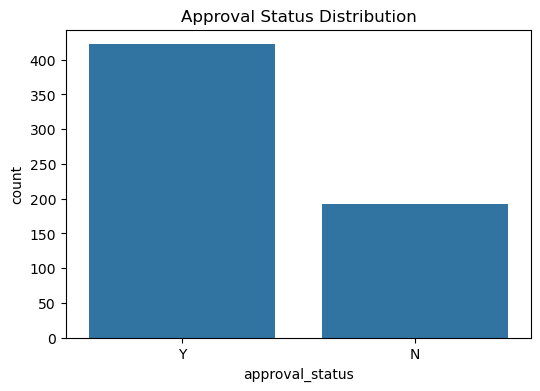

In [16]:
# So firstly coming to visualization I showed how many applications were approved (Y) vs rejected (N)
# here I took the numerical and categorical columns again to visualize them.
numeric = ['primary_income', 'secondary_income', 'loan_amount_requested', 'term_duration_months', 'total_income', 'income_loan_ratio']
categoric = ['applicant_gender', 'is_self_employed', 'education_level', 'has_credit_history', 'is_married']

plt.figure(figsize=(6,4))
sns.countplot(x='approval_status', data=df)
plt.title('Approval Status Distribution')
plt.show()

In [17]:
# So here Clearly we can see that the number of applicants rejected are nearly 200 and number of applicants 
# have been accepted are nearly 400. Here the classes are not much balcanced.

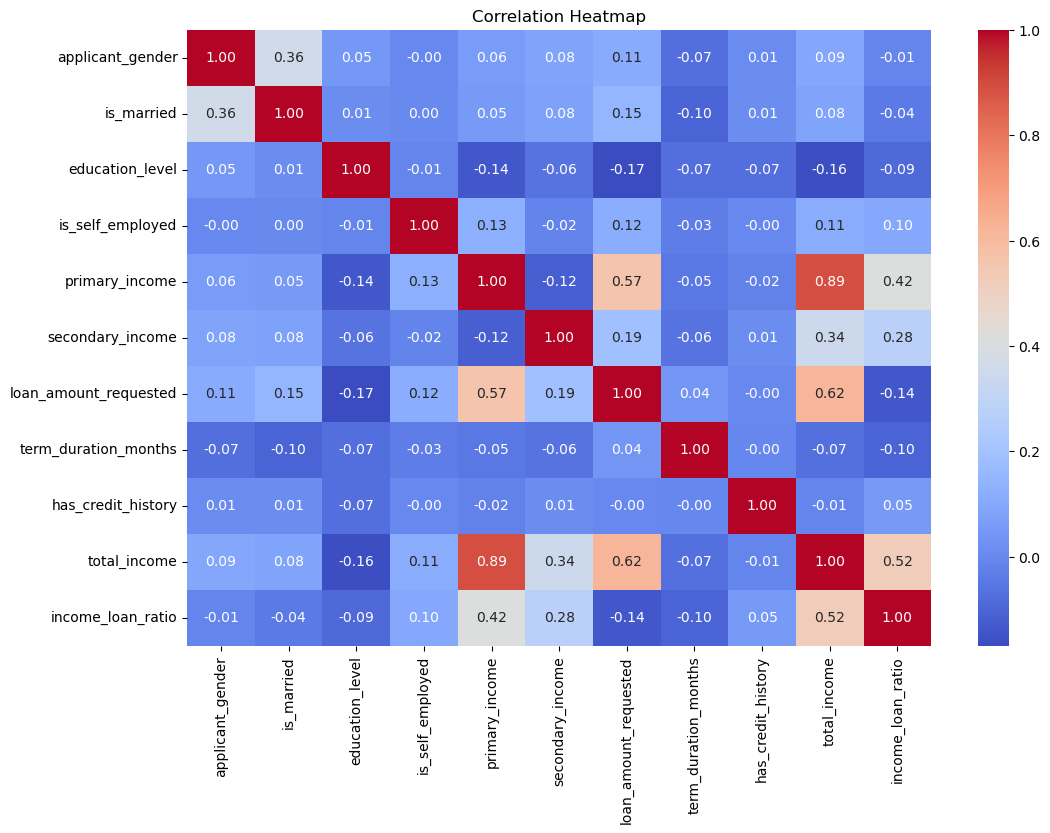

In [18]:
# This is the correlation heatmap where the correlation between the features have been explained and the colors represent correlation,
# as it tends to blue it is low correlated and as it tends to red they are highly correlated 
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# From the graph we can see that total_income and primary_income are highly correlated and then total_income and 
# loan amount requested are moderately corelated and then followed by loan_amount requested and primary_income.

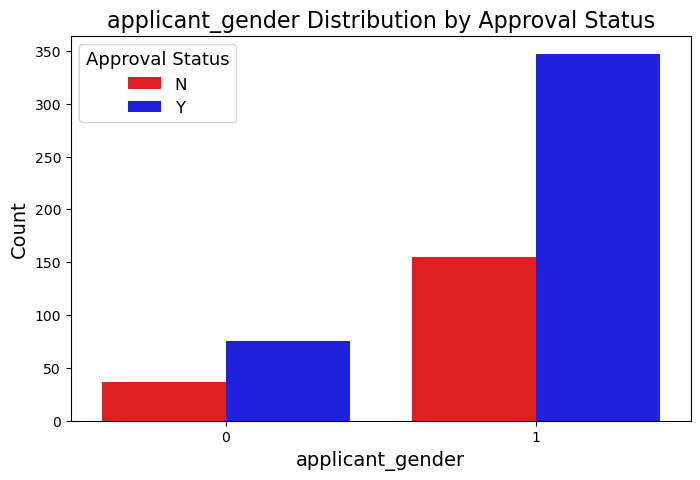

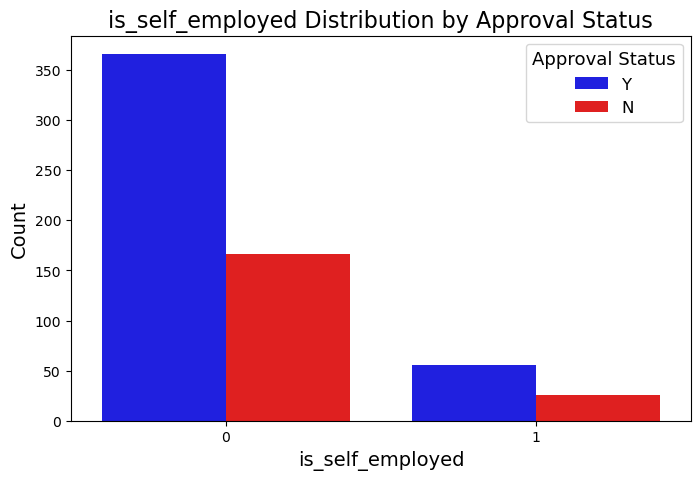

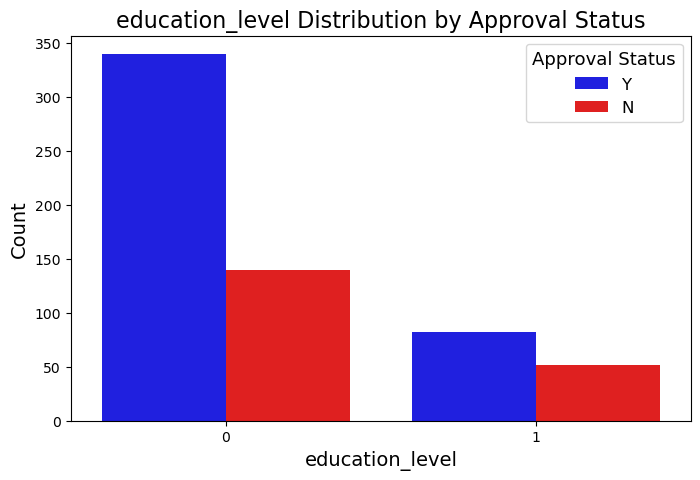

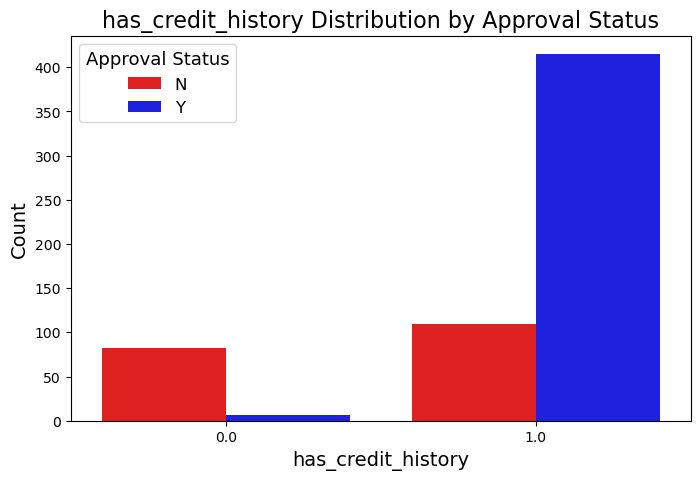

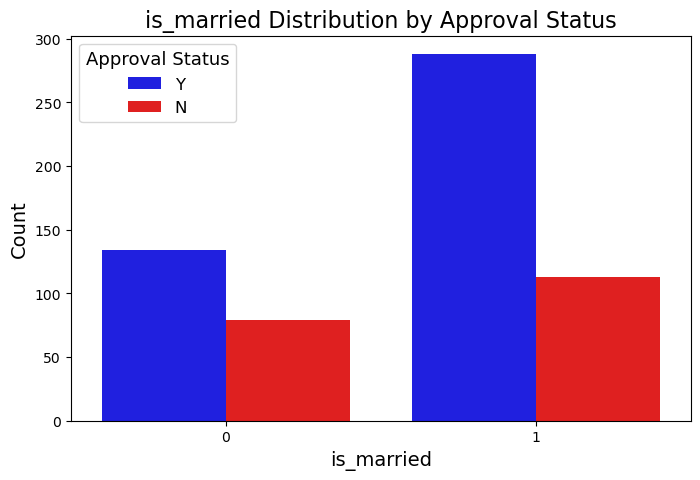

In [20]:
# here I represented the binary catogoric columns and thier coount of approval status in this way we can understand 
# the approval status with respect to the columns easily.
for col in categoric:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=col, hue='approval_status', data=df, palette={'Y': 'blue', 'N': 'red'})
    plt.title(f'{col} Distribution by Approval Status', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Approval Status', title_fontsize='13', fontsize='12')
    plt.show()


In [21]:
# For each binary categorical feature, I have visualized the distribution of approval status, showing the count of applications 
# approved ("Y", in blue) and not approved ("N", in red) for every category. This allows for a clear comparison of 
# approval rates across different groups within each feature.

In [22]:
# here I mapped the approval status to 0's and 1's so that they are encoded 
# to numbers and the operations can be performed easily
# Here, X contains all the independent variables (features), 
# and y contains the dependent variable (target), which is the loan approval status.
df['approval_status'] = df['approval_status'].map({'Y': 1, 'N': 0})
X = pd.concat([scaled_df, df.drop(columns=['approval_status'] + numeric_cols)], axis=1)
y = df['approval_status']

In [23]:
# Here I split the data for training and testing based on all the features I have provided in the X, y and the 
# I took test_size as 20% and since the data is imbalanced I used stratify to maintain the 
# same ratio of the  classes in train and test data so that the model wont
# be biased to one in the test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
# I used Logistic Regression to train the model, selecting parameters to improve accuracy.
# Since the dataset contains only 614 records, I chose the 'liblinear' solver.
# I also increased the maximum number of iterations to 1000 to ensure the model has enough time to converge.
lr_model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [25]:
# I stored the predicted classes of the test dataset in y_pred
# And the y_probs gives the probabilities that each test sample belongs to class 1(Y) or not.
y_pred = lr_model.predict(X_test)
y_probs = lr_model.predict_proba(X_test)[:, 1]

In [26]:
# here we can see the confusion matrix y_test and y_pred. so that I can get the 
# True Positives, False Positives, False Negatives, True Negatives
print(confusion_matrix(y_test, y_pred))

[[25 13]
 [ 9 76]]


In [27]:
# These are all the metrics I took to evaluate the models performance.
# I used these metrics for all the models I trained for this problem.

In [28]:
print("Logistic Regression Metrics:")
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_probs), 2))

Logistic Regression Metrics:
Precision: 0.85
Recall: 0.89
F1 Score: 0.87
ROC AUC Score: 0.8


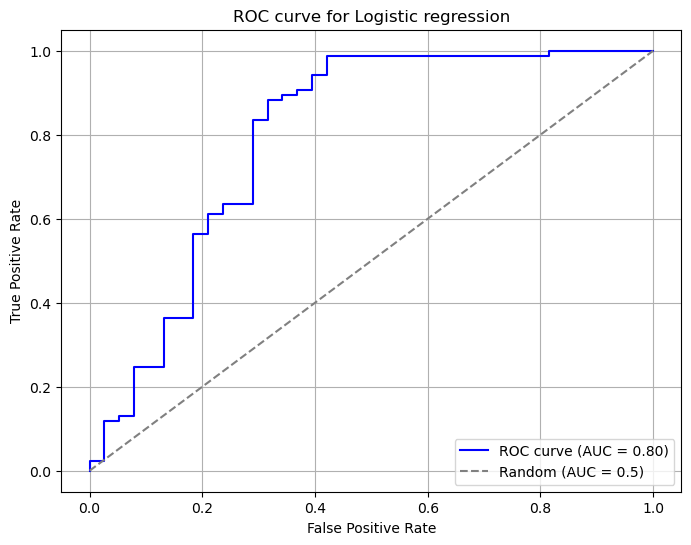

In [29]:
# So here the I took the roc_curve and passed my values to plot the curve and know how the model 
# differentiates between the classes of approval_status.
# So here as the roc_score increases the tilt to top left increases likewise.
# so it is differentiating average here.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Here I plotted the AUC ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [30]:
# So here the model is some biased towards the approval rate because the false positives are more compared to false negatives
# (That's why the recall is high than the precsion) and it is predicting the approvals correctly and prediction of 
# the rejected are some what off so now I will be using the random forest and gradient boosting

In [30]:
# Here I used the RandomForestClassifier to train the model.
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [31]:
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

In [32]:
print(confusion_matrix(y_test, rf_pred))

[[27 11]
 [ 7 78]]


In [33]:
print("Random Forest Metrics:")
print("Precision:", round(precision_score(y_test, rf_pred), 2))
print("Recall:", round(recall_score(y_test, rf_pred), 2))
print("F1 Score:", round(f1_score(y_test, rf_pred), 2))
print("ROC AUC Score:", round(roc_auc_score(y_test, rf_proba), 2))

Random Forest Metrics:
Precision: 0.88
Recall: 0.92
F1 Score: 0.9
ROC AUC Score: 0.86


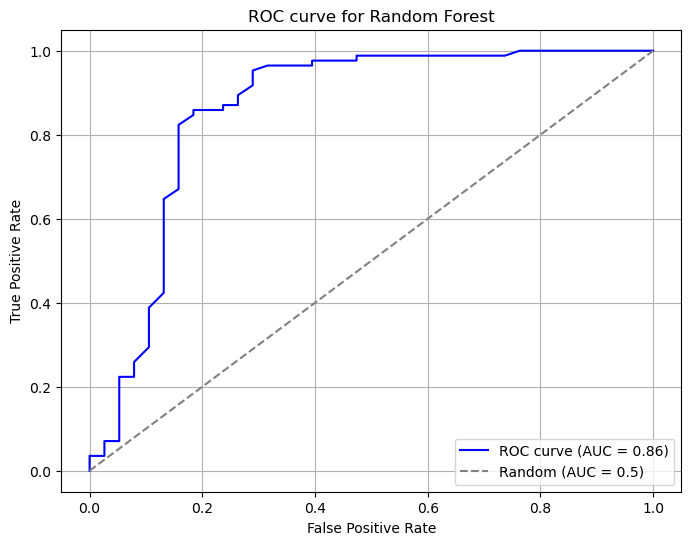

In [34]:
# here I used the predicted variable by probability and tested one to plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [36]:
# So here the curve is more tilted toward top left so here it is differentiating the classes more accurately than
# in logistic regression 

In [35]:
# I passed this dictionary to GridSearchCV, which tries all possible combinations 
# of these values to find the best-performing set using cross-validation.
xgb_params = {
    'n_estimators': [200, 400],
    'max_depth': [3, 5],# And I only kept max dpth as 3, 5 so that it would be simple                  
    'learning_rate': [0.05, 0.1],# Here I have given based on the correction of the last before tree
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3],
}


In [36]:
# here I used the GridSearchCV for hyperparametertuning 
# here I used 5 folds for cross-validation
# and used f1 score as a metric to optimize
xgb_grid = GridSearchCV(XGBClassifier(
    random_state=42, eval_metric='logloss'),
    xgb_params,
    cv=5, 
    scoring='f1', 
    n_jobs=-1)

# here I used to_numpy to make sure there are no objects in the data.
xgb_grid.fit(X_train.to_numpy(), y_train.to_numpy())

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [200, 400],
                         'subsample': [0.8]},
             scoring='f1')

In [37]:
# So the model which gives the best is selected using best_estimator_ according to the metric F1-score
# The predictions and the probabilities are taken same as logistic regression and Random  
best_xgb = xgb_grid.best_estimator_
xgb_pred = best_xgb.predict(X_test.to_numpy())
xgb_proba = best_xgb.predict_proba(X_test.to_numpy())[:, 1]

In [38]:
print(confusion_matrix(y_test, xgb_pred))

[[27 11]
 [ 2 83]]


In [39]:
print("XGBoost Metrics:")
print(f"Precision: {precision_score(y_test, xgb_pred):.2f}")
print(f"Recall: {recall_score(y_test, xgb_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, xgb_pred):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, xgb_proba):.2f}")

XGBoost Metrics:
Precision: 0.88
Recall: 0.98
F1 Score: 0.93
ROC AUC Score: 0.87


In [40]:
# So here we can see that it has solid performance because there are only
# few false positives (approving bad loans), and since recall is high the good applicants are being approved
# and the F1-score is more so both the precision and recall are balanced 

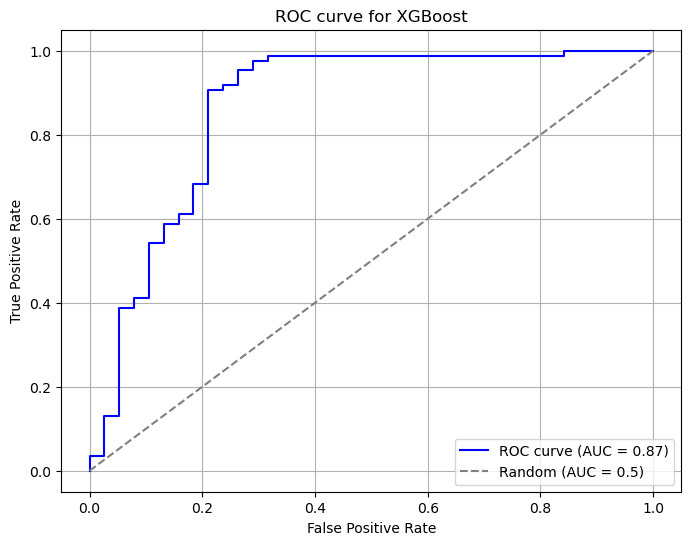

In [41]:
# here I used the predicted probabilities calculated and test data for plotting the ROC AUC curve 
fpr, tpr, thresholds = roc_curve(y_test, xgb_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [44]:
# since here the curve is top left tilted and more moving outside. The model
# is differentiating the classes well.
# And when compared to the AUC of the random forest and AUC of the logistic regression we 
# can say that the classes are more differentiated in Gradient Boosting

In [ ]:
# Saving the models in pickle files
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [ ]:
with open('xgboost_model.pkl', 'rb') as f:
    pickle.dump(best_xgb, f)

In [42]:
# Here I created the classification report for the XGBoost model
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81        38
           1       0.88      0.98      0.93        85

    accuracy                           0.89       123
   macro avg       0.91      0.84      0.87       123
weighted avg       0.90      0.89      0.89       123



## Classification Report 
Here the model performs well overall, showing particularly strong results for class 1, with high precision and recall that indicate consistent predictions. While the recall for class 0 is a bit lower, the F1-score is still quite good, so that the model is handling both classes reasonably well. Overall, the results point to a well-balanced and effective model.

In [43]:
# Finally, I checked the XGB model's performance on the test and train data, and since 
# the results are good, so there is no overfitting.
train_pred = best_xgb.predict(X_train)
test_pred = best_xgb.predict(X_test)
f1_train = f1_score(y_train, train_pred)
f1_test = f1_score(y_test, test_pred)

print(f"F1 Score - Train: {f1_train:.2f}, Test: {f1_test:.2f}")

F1 Score - Train: 0.90, Test: 0.93


In [44]:
# So the overall performance of all the three the Gradient boosting is performing best
# I will be using Gradient Bossting which has balanced precision and recall
# Precision: 0.87
# Recall: 0.95